In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [2]:
train_data=pd.read_csv('train.csv')
train_labels=pd.read_csv('train_labels.csv')

In [3]:
train_data.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [4]:
train_data.isnull().any()

sequence     False
subject      False
step         False
sensor_00    False
sensor_01    False
sensor_02    False
sensor_03    False
sensor_04    False
sensor_05    False
sensor_06    False
sensor_07    False
sensor_08    False
sensor_09    False
sensor_10    False
sensor_11    False
sensor_12    False
dtype: bool

In [5]:
train_labels.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [6]:
train_data=train_data.merge(train_labels,on='sequence')

In [7]:
train_data.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0


In [8]:
#Checking Corelation.
features=[col for col in train_data.columns if col not in ('sequence','subject','step','state')]

In [9]:
corelation=train_data[features].corr()
corelation

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
sensor_00,1.000000,0.270416,0.000134,-0.045438,-0.001280,0.001453,0.531812,0.049807,-0.004507,0.478972,-0.000233,-0.089525,-0.000120
sensor_01,0.270416,1.000000,0.000253,0.007056,0.004169,-0.004363,0.328691,-0.055740,-0.005967,0.222082,0.000088,0.245083,-0.001769
sensor_02,0.000134,0.000253,1.000000,-0.000646,0.000290,0.001385,0.000143,-0.000402,-0.000403,0.000202,0.003469,-0.000088,-0.000343
sensor_03,-0.045438,0.007056,-0.000646,1.000000,-0.001226,0.002956,0.031617,0.565541,0.012267,-0.023650,-0.005500,0.501528,-0.000658
sensor_04,-0.001280,0.004169,0.000290,-0.001226,1.000000,0.001469,-0.001009,-0.002383,-0.000150,0.002782,0.227802,-0.001559,-0.016335
sensor_05,0.001453,-0.004363,0.001385,0.002956,0.001469,1.000000,-0.002843,0.004495,0.005055,0.001418,0.001771,-0.000279,0.000817
sensor_06,0.531812,0.328691,0.000143,0.031617,-0.001009,-0.002843,1.000000,-0.005468,0.003308,0.407189,0.000640,-0.010232,-0.000749
sensor_07,0.049807,-0.055740,-0.000402,0.565541,-0.002383,0.004495,-0.005468,1.000000,0.009365,-0.010168,0.000011,0.451613,-0.001853
sensor_08,-0.004507,-0.005967,-0.000403,0.012267,-0.000150,0.005055,0.003308,0.009365,1.000000,-0.009789,-0.000203,0.009356,-0.000646
sensor_09,0.478972,0.222082,0.000202,-0.023650,0.002782,0.001418,0.407189,-0.010168,-0.009789,1.000000,0.002988,-0.074217,-0.000400


Text(0.5, 1.0, 'Correlation Heatmap of all the Features')

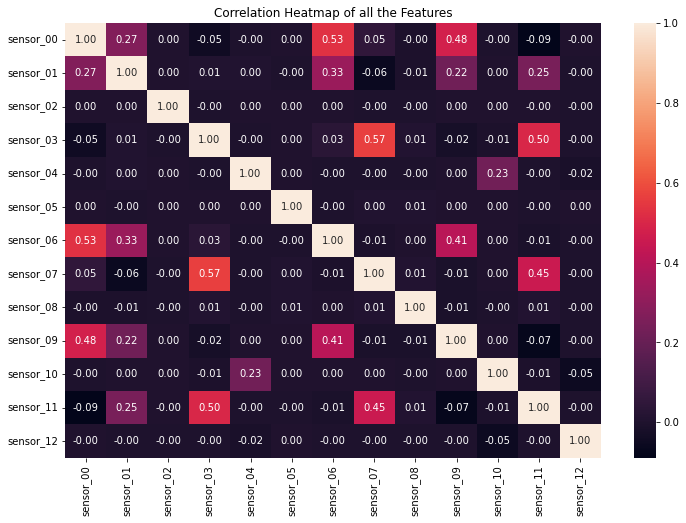

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corelation,annot=True,fmt='.2f')
plt.title('Correlation Heatmap of all the Features')

In [11]:
train_data[features].describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
count,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06
mean,4.365526e-04,-1.034982e-03,-2.178045e-01,-2.156555e-03,-1.828903e-03,-1.651785e-03,-4.122917e-04,-2.620665e-05,-1.298393e-04,1.365584e-03,3.315801e-04,-3.733291e-03,-1.172605e-02
std,2.658684e+00,4.404200e+00,2.298002e+00,3.934184e+00,1.683685e+00,1.590818e+00,3.345143e+00,3.243428e+00,4.501534e+00,2.592913e+00,1.917333e+00,4.532568e+00,3.911767e+01
min,-3.750634e+02,-4.345977e+02,-3.165948e+01,-4.083761e+02,-2.362601e+01,-7.498280e+01,-4.705046e+02,-4.070115e+02,-5.361000e+02,-2.703468e+02,-4.341271e+01,-4.270586e+02,-6.125494e+02
25%,-5.000000e-01,-4.831933e-01,-6.461531e-01,-4.929204e-01,-4.729928e-01,-4.786836e-01,-4.927140e-01,-5.022901e-01,-5.000000e-01,-5.151734e-01,-4.787939e-01,-4.835391e-01,-5.805627e-01
50%,-3.091190e-03,3.151261e-03,0.000000e+00,0.000000e+00,-1.589577e-03,2.991773e-03,9.107468e-04,-2.290076e-03,0.000000e+00,-1.445087e-03,-1.655822e-03,3.086420e-03,0.000000e+00
75%,4.845440e-01,4.926471e-01,3.338469e-01,4.893805e-01,4.701565e-01,5.056096e-01,4.927140e-01,4.847328e-01,5.000000e-01,5.086705e-01,4.780386e-01,4.938272e-01,5.703325e-01
max,3.358246e+02,4.495914e+02,1.666667e+00,4.366504e+02,2.487286e+01,7.791548e+01,4.425009e+02,3.312542e+02,6.301000e+02,3.679812e+02,4.186559e+01,4.480206e+02,6.305111e+02


In [33]:
X=train_data[features]
y=train_data['state']

In [17]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=2)

In [26]:
xgb=XGBClassifier(n_estimators=50,max_depth=5,learning_rate=0.1,random_state=2,objective='binary:logistic')

In [27]:
xgb.fit(X_train,y_train,eval_set=[(X_valid, y_valid)],eval_metric=['auc','logloss'],early_stopping_rounds=64,verbose=32)

[0]	validation_0-auc:0.58786	validation_0-logloss:0.69054
[32]	validation_0-auc:0.62060	validation_0-logloss:0.67124
[49]	validation_0-auc:0.62563	validation_0-logloss:0.66869


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
preds=xgb.predict(X_valid)

In [31]:
score=roc_auc_score(y_valid,preds)

In [32]:
print(score)

0.5907072193299389
